# Entscheidungsbaum



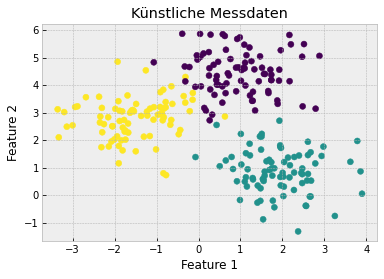

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, centers=3, random_state=0, cluster_std=0.8)

import matplotlib.pylab as plt; 
plt.style.use('bmh')
plt.rcParams['font.family'] = ['TeX Gyre Heros', 'sans-serif']

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten');

Wir lassen Scikit-Learn einen Entscheidungsbaum erstellen. Dazu importieren wir
`DecisionTreeClassifier` aus dem Untermodul `sklearn.tree`. Danach trainieren
wir den Entscheidungsbaum mit `.fit()`.

In [2]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X,y);

Aber wie sieht denn jetzt die Prognose des Entscheidungsbaums aus? 

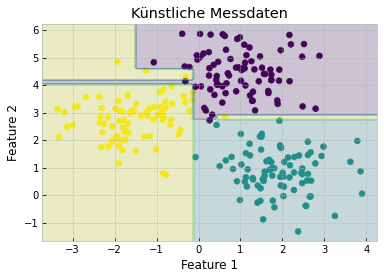

In [3]:
import numpy as np

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X1_plot, X2_plot = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
X_plot = np.column_stack((X1_plot.ravel(), X2_plot.ravel()))
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);

Der blaue Streifen, der nach links ragt, und der gelbe Streifen, der nach rechts
ragt, passen nicht recht zu den Grenzen, die ein Mensche wohl gezogen hätte.
Entscheidungsbäume neigen sehr schnell zum Overfitting. Eine einfach
Möglichkeit, um das Overfitting zu reduzieren, ist die Tiefe des
Entscheidungsbaumes zu begrenzen. Das passiert mit dem optionalem Argument
`max_depth=`.  Wir setzen die maximale Tiefe erst auf den Wert 3, dann auf 4.

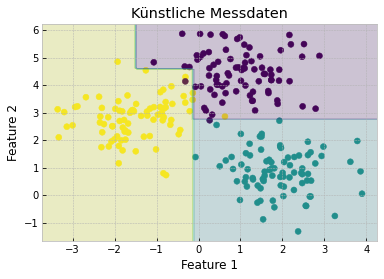

In [4]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X,y);
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);

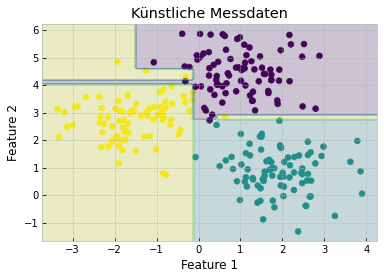

In [5]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X,y);
y_plot = model.predict(X_plot)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Künstliche Messdaten')
ax.contourf(X1_plot, X2_plot,y_plot.reshape(100,100), alpha=0.2);

In [11]:
import pandas as pd 

data = pd.read_csv('20221219_efahrer_EAutos.csv', skiprows=1, index_col=0)
data.head(15)

,Reichweite,Leistung,Listenpreis
Modell,,,
Opel Rocks-e,75,8,7990
Renault Twizy Life (2-Sitzer),100,12,11450
VW e-up!(2020),260,8,21421
Dacia Spring,230,45,22550
Renault Zoe R90,316,92,27000
Fiat 500,180,95,30990
Hyundai Kona Elektro (9.2 kWh),305,136,36400
VW ID.4 Pure,345,170,37415
BMW i3,309,170,39900


In [12]:
filter = data.loc[:,'Listenpreis'] > 40000

data.loc[filter,'teuer'] = 1
data.loc[~filter, 'teuer'] = 0

data.head(15)


,Reichweite,Leistung,Listenpreis,teuer
Modell,,,,
Opel Rocks-e,75,8,7990,0.0
Renault Twizy Life (2-Sitzer),100,12,11450,0.0
VW e-up!(2020),260,8,21421,0.0
Dacia Spring,230,45,22550,0.0
Renault Zoe R90,316,92,27000,0.0
Fiat 500,180,95,30990,0.0
Hyundai Kona Elektro (9.2 kWh),305,136,36400,0.0
VW ID.4 Pure,345,170,37415,0.0
BMW i3,309,170,39900,0.0


In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(random_state=1234, max_depth=4)

X = data.loc[:, 'Reichweite':'Leistung']
y = data.loc[:, 'teuer']

model.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=1234)

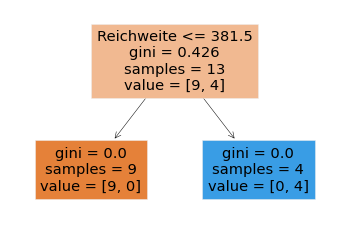

In [14]:
import matplotlib.pylab as plt

plt.figure()
plot_tree(model, filled=True, feature_names=['Reichweite','Leistung'])
plt.show()